# Introducción

En esta práctica vamos a examinar un conjunto de datos que contiene información biométrica y de salud, con el fin de determinar la presencia o ausencia del hábito de fumar en los individuos a partir de señales bio-saludables. El archivo smoking.csv que utilizaremos incluye características diferentes, tales como edad, peso, altura, niveles de glucosa en ayuno y colesterol, entre otros.

Este análisis nos permitirá aplicar y profundizar en técnicas de Machine Learning como SVM y kNN, así como en métodos de ingeniería de características, esenciales para la preparación y optimización de los datos para la modelización. Abordaremos la transformación de variables numéricas y categóricas, y exploraremos cómo estos procesos afectan el rendimiento de los modelos predictivos.

Comenzaremos con una exploración de los datos para entender su estructura y las relaciones entre las diferentes variables. Posteriormente, prepararemos los datos para su análisis, aplicando técnicas de preprocesamiento y generando nuevas características que nos ayudarán a capturar la complejidad del conjunto de datos y a mejorar la precisión de nuestros modelos predictivos.

## El Dataset

El conjunto de datos con el que trabajaremos incluye una serie de atributos relacionados con la salud y mediciones biométricas. Aquí está la descripción de cada atributo y su posible asociación con el hábito de fumar:

* **ID**: Identificador único para cada individuo en el dataset. No tiene asociación directa con el hábito de fumar.
* **Gender**: Género del individuo, que puede tener variaciones en la prevalencia del hábito de fumar.
* **Age**: Edad del individuo, presentada en intervalos de 5 años. La prevalencia del hábito de fumar a menudo disminuye con la edad.
* **Height**: Altura en centímetros. No tiene una asociación directa con el hábito de fumar.
* **Weight**: Peso en kilogramos. El fumar puede influir en el peso y varía individualmente.
* **Waist**: Circunferencia de la cintura en centímetros. El fumar puede afectar la distribución de la grasa corporal.
* **Eyesight** (Left/Right): Medición de la agudeza visual para el ojo izquierdo/derecho. No tiene asociación directa con el hábito de fumar.
* **Hearing** (Left/Right): Medición de la audición para el oído izquierdo/derecho. No tiene asociación directa con el hábito de fumar.
* **Systolic BP**: Presión arterial sistólica. El fumar puede afectar la presión arterial.
* **Diastolic BP**: Presión arterial diastólica. El fumar puede afectar la presión arterial.
* **Fasting Blood Sugar**: Nivel de azúcar en sangre en ayuno. El fumar puede impactar los niveles de azúcar en sangre.
Cholesterol (Total): Nivel total de colesterol. El fumar puede influir en los niveles de colesterol.
* **Triglyceride**: Nivel de triglicéridos. El fumar puede influir en los niveles de triglicéridos.
* **HDL Cholesterol**: Nivel de colesterol HDL. El fumar puede disminuir los niveles de colesterol HDL.
* **LDL Cholesterol**: Nivel de colesterol LDL. El fumar puede influir en los niveles de colesterol LDL.
* **Hemoglobin**: Nivel de hemoglobina. No tiene asociación directa con el hábito de fumar.
* **Urine Protein**: Presencia de proteína en la orina. El fumar puede impactar la función renal.
* **Serum Creatinine**: Nivel de creatinina en suero. El fumar puede impactar la función renal.
* **AST/ALT**: Niveles de transaminasas glutámico oxaloacéticas. El fumar puede impactar la función hepática.
* **GTP**: Nivel de γ-GTP. El fumar puede impactar el nivel de enzimas hepáticas.
* **Oral Exam Status**: Estado del examen oral. El fumar puede impactar la salud oral.
* **Dental Caries**: Presencia de caries dentales. El fumar puede afectar la salud dental.
* **Tartar Status**: Estado del tártaro. El fumar puede afectar la salud dental.
* **Blood Group**: Grupo sanguíneo del individuo.
* **Smoking Status**: Indica si el individuo es fumador o no. Esta es la variable objetivo que indica directamente el hábito de fumar.

Es importante comprender estas asociaciones, ya que nos ayudarán a determinar qué características pueden ser más relevantes para nuestros modelos predictivos y cómo podríamos necesitar transformarlas para mejorar la precisión de nuestras predicciones.







# 0. Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [ ]:
df = pd.read_csv('habitos_fumadores.csv')

# Exploración Inicial de Datos

**Ejercicio 1** - Declara el tamaño del dataset. Con respecto a las columnas, identifica qué variables son numéricas y cuáles son categóricas. ¿Cuál es el individuo menos pesado? ¿Y el más alto? Dibuja un histograma de hombres y mujeres atendiendo a si fuman o no.

In [ ]:
#Tamaño Dataset
df.shape

(55692, 28)

In [ ]:
#Tipos de variables
df.dtypes

,0
ID,int64
gender,object
age,int64
height(cm),int64
weight(kg),int64
waist(cm),float64
eyesight(left),float64
eyesight(right),float64
hearing(left),float64
hearing(right),float64


In [ ]:
df.head(10)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,blood_group
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0,A+
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0,A-
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,1.0,1.0,21.0,16.0,22.0,Y,0,N,1,0+
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0,A+
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,1.0,0.6,16.0,14.0,22.0,Y,0,N,0,A-
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0,A-
6,6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,...,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1,A-
7,7,M,45,165,90,96.0,1.2,1.0,1.0,1.0,...,1.0,1.3,38.0,71.0,111.0,Y,0,Y,0,A-
8,9,F,50,150,60,85.0,0.7,0.8,1.0,1.0,...,1.0,0.8,31.0,31.0,14.0,Y,0,N,0,0+
9,10,M,45,175,75,89.0,1.0,1.0,1.0,1.0,...,1.0,0.8,26.0,24.0,63.0,Y,0,N,0,A-


In [ ]:
df['hearing(left)'].unique()

array([1., 2.])

In [ ]:
df['hearing(right)'].unique()

array([1., 2.])

In [ ]:
df['Urine protein'].unique()

array([1., 3., 2., 4., 5., 6.])

In [ ]:
df['oral'].unique()

array(['Y'], dtype=object)

In [ ]:
df['tartar'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df['dental caries'].unique()

array([0, 1])

In [ ]:
df['smoking'].unique()

array([0, 1])

In [ ]:
df['blood_group'].unique()

array(['A+', 'A-', '0+', 'B+'], dtype=object)

In [ ]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
#Individuo menos pesado y el más alato
print(df['weight(kg)'].min())
print(df['height(cm)'].max())


30
190


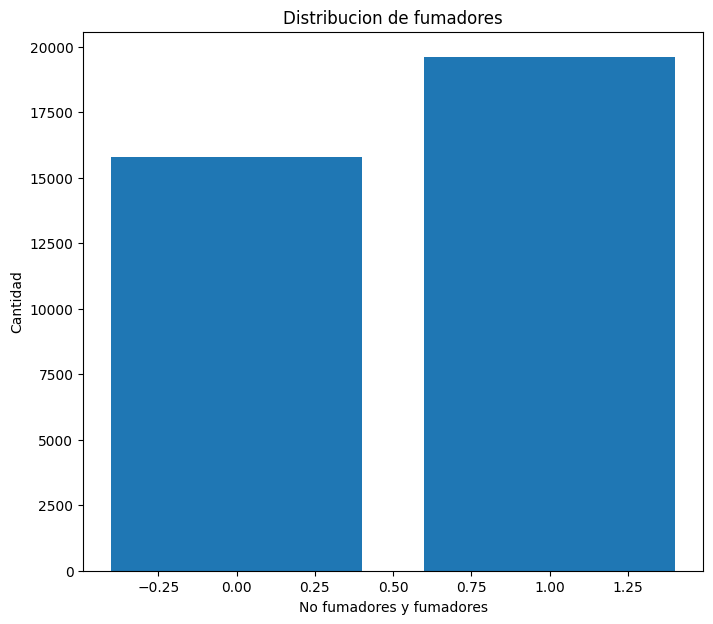

In [ ]:
# Creo un subdf para los hombres
dfmen = df[df['gender'] == 'M']


plt.figure(figsize=(8, 7))
# cuento los fumadores y no fumadores en el dfmen
smoking_countsM = dfmen['smoking'].value_counts()

# Creo un gráfico de barras
plt.bar(smoking_countsM.index, smoking_countsM.values)

plt.title('Distribucion de fumadores')
plt.xlabel('No fumadores y fumadores')
plt.ylabel('Cantidad')
plt.show()

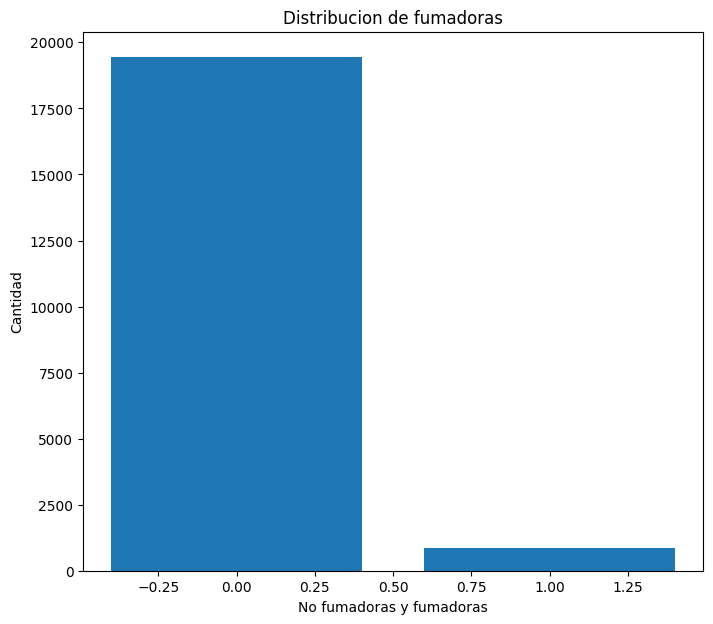

In [ ]:
#Creo un subdf para las mujeres
dfwomen = df[df['gender'] == 'F']


plt.figure(figsize=(8, 7))
# Cuento las fumadoras y no fumadoras
smoking_countsF = dfwomen['smoking'].value_counts()

# Creo mi gráfico de barras
plt.bar(smoking_countsF.index, smoking_countsF.values)

plt.title('Distribucion de fumadoras')
plt.xlabel('No fumadoras y fumadoras')
plt.ylabel('Cantidad')
plt.show()

Tenemos que las variables Gender, blood group, smoking, dental caries, tartar, oral, Urine protein, y hearing son categóricas, el resto son variables contínuas.

**Ejercicio 2** - Sobre la variable continua "age" aplica una binarización por umbralización, tomando como umbral la media de las edades, incluyendo esta variable en el Dataframe como "age_bin". Haz un conteo de las dos categorías resultantes en la variable binarizada. Sobre la variable continua "Cholesterol" aplica una agrupación por cuantiles usando percentiles. Incluye esta variable en el dataframe como "Cholesterol_per".

In [ ]:
#Binarización por umbralización
#Lo hago aplicando una lambda
df['age_bin'] = df['age'].apply(lambda x: 1 if x > df['age'].mean() else 0)

In [ ]:
#Cuento cuantos de cada categoría tengo
print(df[df['age_bin'] == 0]['age_bin'].value_counts())
print(df[df['age_bin'] == 1]['age_bin'].value_counts())

age_bin
0    28847
Name: count, dtype: int64
age_bin
1    26845
Name: count, dtype: int64


Separo mi variable colesterol en 100 clases diferentes con percentiles

In [ ]:
#Uso la funcion qcut para dividir mi variable n veces, en este caso 100 ya qeu se me pide en percentiles
df['Cholesterol_per']=pd.qcut(df['Cholesterol'], q=100, labels=False, duplicates='drop')

In [ ]:
df.head(10)


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,AST,ALT,Gtp,oral,dental caries,tartar,smoking,blood_group,age_bin,Cholesterol_per
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,18.0,19.0,27.0,Y,0,Y,0,A+,0,67
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,22.0,19.0,18.0,Y,0,Y,0,A-,0,44
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,21.0,16.0,22.0,Y,0,N,1,0+,1,86
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,19.0,26.0,18.0,Y,0,Y,0,A+,0,96
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,16.0,14.0,22.0,Y,0,N,0,A-,0,36
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,18.0,27.0,33.0,Y,0,Y,0,A-,0,69
6,6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,...,21.0,27.0,39.0,Y,1,Y,1,A-,0,76
7,7,M,45,165,90,96.0,1.2,1.0,1.0,1.0,...,38.0,71.0,111.0,Y,0,Y,0,A-,1,73
8,9,F,50,150,60,85.0,0.7,0.8,1.0,1.0,...,31.0,31.0,14.0,Y,0,N,0,0+,1,62
9,10,M,45,175,75,89.0,1.0,1.0,1.0,1.0,...,26.0,24.0,63.0,Y,0,N,0,A-,1,50


**Ejercicio 3** - Sobre la variable continua "fasting blood sugar" aplica un escalado máximo-mínimo. Dibuja un histograma de la variable original y otro histograma de la variable tras el escalado: ¿qué conclusiones sacas viendo ambos histogramas?

In [ ]:
#Veo como es mi columna fasting blood sugar
print(df['fasting blood sugar'])

0         94.0
1        130.0
2         89.0
3         96.0
4         80.0
         ...  
55687     89.0
55688     89.0
55689     88.0
55690    107.0
55691     82.0
Name: fasting blood sugar, Length: 55692, dtype: float64


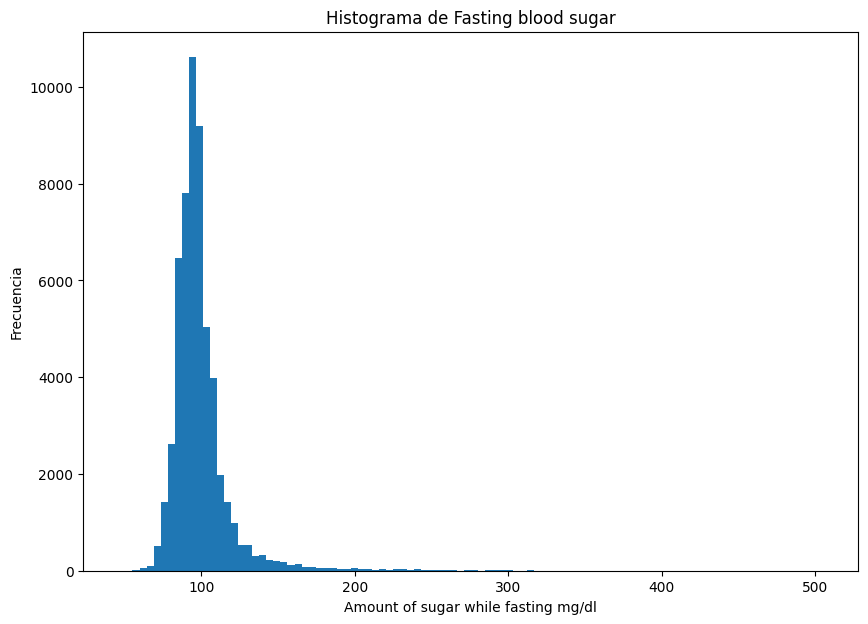

In [ ]:
#Creo un histograma de mi variable fasting blood sugar
plt.figure(figsize=(10, 7))
plt.hist(df['fasting blood sugar'], bins=100)
plt.title('Histograma de Fasting blood sugar')
plt.xlabel('Amount of sugar while fasting mg/dl')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
#Importo mi función de sklearn
from sklearn.preprocessing import MinMaxScaler


In [ ]:
#Normalizo mi variable con un max min scaling para poder interpretarlo mejor
#Creo una nueva columna con la variable normalizada
scaler = MinMaxScaler()
df['fasting blood sugar_norm'] = scaler.fit_transform(df[['fasting blood sugar']])

Text(0, 0.5, 'Frecuencia')

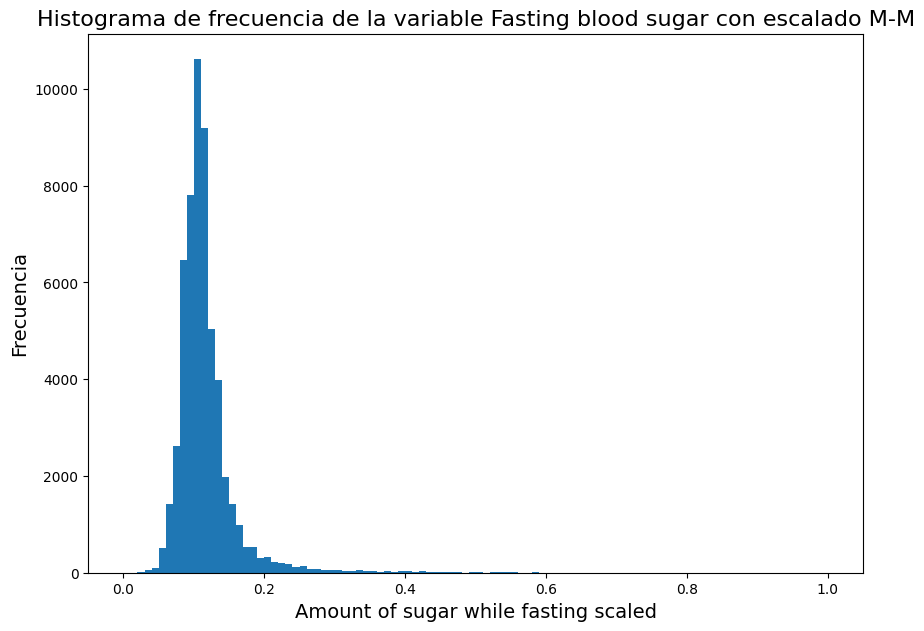

In [ ]:
#Represento un histograma de mi variable escalada
plt.figure(figsize=(10, 7))
plt.hist(df['fasting blood sugar_norm'], bins=100)
plt.title('Histograma de frecuencia de la variable Fasting blood sugar con escalado M-M', fontsize=16)
plt.xlabel('Amount of sugar while fasting scaled', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

A través de la observación de las dos representaciones podemos ver que la mayoría de datos de la variable se concentran en la parte izquierda, podemos ver que al realizar el escalado no perdemos información, ya que las distribuciones se ven exáctamente iguales. Además de eso ganamos otras ventajas como una mayor capacidad de interpretación con respecto a otras variables ya que hemos realizado una normalización. Tambien este tipo de escalado es beneficioso para la posterior aplicación de algoritmos como KNN o SVM.

**Ejercicio 4** - Aisla la variable discreta "blood_group" en un dataframe que se componga de esa única variable. Genera 3 dataframes diferentes:

*   Uno con variables generadas mediante el método one-hot encoding
*   Otro con variables generadas mediante el método dummy coding
*   Un último con variables generadas mediante el método effect coding



In [ ]:

dfblood=df[['blood_group']]


In [ ]:
dfblood.head(10)

,blood_group
0,A+
1,A-
2,0+
3,A+
4,A-
5,A-
6,A-
7,A-
8,0+
9,A-


**One hot encoding**

In [ ]:
#Aplico el one hot a mi df
dfbloodOH = pd.get_dummies(dfblood, columns = ['blood_group'])
dfbloodOH = dfbloodOH.replace({True: 1, False: 0})

<ipython-input-8-fd04019d0095>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfbloodOH = dfbloodOH.replace({True: 1, False: 0})


In [ ]:
dfbloodOH.head(10)

,blood_group_0+,blood_group_A+,blood_group_A-,blood_group_B+
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,0,0,1,0


**Dummy Coding**

In [ ]:
#aplico dummy coding al df
dfbloodDC = dfbloodOH.drop('blood_group_B+',axis=1)

In [ ]:
# Instead of assigning the entire dfbloodDC DataFrame,
# Concatenate the one-hot encoded columns to the original DataFrame:
df = pd.concat([df, dfbloodDC], axis=1)

# Optionally, drop the original 'blood_group' column if you no longer need it:
df = df.drop('blood_group', axis=1)

In [ ]:
dfbloodDC.head(15)

,blood_group_0+,blood_group_A+,blood_group_A-
0,0,1,0
1,0,0,1
2,1,0,0
3,0,1,0
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,1,0,0
9,0,0,1


**Effect coding**

In [ ]:
#aplico el effect coding
dfbloodEC = dfbloodDC.copy()

all_zeros = (dfbloodEC == 0).all(axis=1)

dfbloodEC.loc[all_zeros, :] = -1


In [ ]:
dfbloodEC.head(15)

,blood_group_0+,blood_group_A+,blood_group_A-
0,0,1,0
1,0,0,1
2,1,0,0
3,0,1,0
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,1,0,0
9,0,0,1


# Preprocesamiento de Datos

**Ejercicio 5**: En esta sección, continuar con la preparación de nuestro conjunto de datos para el análisis. Basándose en las tareas realizadas anteriormente:

* **División del conjunto de datos**: Segmentar los datos utilizando la librería scikitlearn con la semilla reproducible "1234", utilizando un 80% de conjunto de entrenamiento y un 20% de conjunto de testeo. Indicar el tamaño de ambos conjuntos.

In [ ]:
#Cambio gender a columna binaria con una lambda
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)
df = df.drop('oral', axis=1)
df['tartar'] = df['tartar'].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
#Importo librerías necesarias
from sklearn.model_selection import train_test_split

In [ ]:
#Divido mis datos en train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop('smoking', axis=1), df['smoking'], test_size=0.2, random_state=1234)

In [ ]:
#Expongo los tamaños de los conjuntos test y train
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44553, 31)
(11139, 31)
(44553,)
(11139,)


In [ ]:
df.head(10)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Gtp,dental caries,tartar,smoking,age_bin,Cholesterol_per,fasting blood sugar_norm,blood_group_0+,blood_group_A+,blood_group_A-
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,...,27.0,0,1,0,0,67,0.104575,0,1,0
1,1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,...,18.0,0,1,0,0,44,0.183007,0,0,1
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,22.0,0,0,1,1,86,0.093682,1,0,0
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,...,18.0,0,1,0,0,96,0.108932,0,1,0
4,4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,...,22.0,0,0,0,0,36,0.074074,0,0,1
5,5,1,30,180,75,85.0,1.2,1.2,1.0,1.0,...,33.0,0,1,0,0,69,0.106754,0,0,1
6,6,1,40,160,60,85.5,1.0,1.0,1.0,1.0,...,39.0,1,1,1,0,76,0.104575,0,0,1
7,7,1,45,165,90,96.0,1.2,1.0,1.0,1.0,...,111.0,0,1,0,1,73,0.244009,0,0,1
8,9,0,50,150,60,85.0,0.7,0.8,1.0,1.0,...,14.0,0,0,0,1,62,0.087146,1,0,0
9,10,1,45,175,75,89.0,1.0,1.0,1.0,1.0,...,63.0,0,0,0,1,50,0.104575,0,0,1


In [ ]:
#Estandarizo mis variables para poder aplicar el modelo de manera exitosa

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)  # X_train son tus datos de entrenamiento

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Análisis Exploratorio de Datos (EDA)

**Ejercicio 6**: Explorar profundamente los datos para obtener insights que guíen la construcción del modelo:

* **Distribución de variables**: Para la variable "age" aplicar una agrupación por cuantiles utilizando deciles. Para cada grupo calcular el WoE asociado de forma manual. Calcular el IV de la variable discretizada con respecto al target. ¿Crees que es una variable importante de cara a su relación con la variable objetivo (smoking)?

* **Relaciones entre variables**: Realiza el mismo ejercicio para la variable "Height". Segun los resultados obtenidos, ¿cuál crees que tiene un poder predictor más fuerte?

**Variable Age**

In [ ]:
#Uso qcut para dividir age en deciles
df['age']=pd.qcut(df['age'], q=10, labels=False, duplicates='drop')

In [ ]:
np.sort(df['age'].unique())

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
#Calculo los WoE de cada división de mi variable age
#Primero defino una sub base de datos con age_decile y la variable objetivo
df_AgeWoe = df[['age', 'smoking']]
total_malos = df_AgeWoe[df_AgeWoe['smoking'] == 1].shape[0]
total_buenos = df_AgeWoe[df_AgeWoe['smoking'] == 0].shape[0]


In [ ]:
woes = []
ivs  = []

for elem in np.sort(df_AgeWoe['age'].unique()):


  count_buenos =df_AgeWoe[(df_AgeWoe['age']==elem) & (df_AgeWoe['smoking']==0)].shape[0]
  count_malos  =df_AgeWoe[(df_AgeWoe['age']==elem) & (df_AgeWoe['smoking']==1)].shape[0]
  total_count = count_buenos + count_malos


  print(f"Bin Age : {elem}")
  print(f"Fuman : {count_malos}")
  print(f"No Fuman : {count_buenos}")
  print(f"Total : {total_count}\n")

  porc_buenos = count_buenos / total_buenos
  porc_malos = count_malos / total_malos
  woes.append(np.log(porc_buenos/porc_malos))
  ivs.append((porc_buenos-porc_malos)*np.log(porc_buenos/porc_malos))

Bin Age : 0
Fuman : 4388
No Fuman : 4798
Total : 9186

Bin Age : 1
Fuman : 2388
No Fuman : 2092
Total : 4480

Bin Age : 2
Fuman : 5593
No Fuman : 9588
Total : 15181

Bin Age : 3
Fuman : 2367
No Fuman : 4670
Total : 7037

Bin Age : 4
Fuman : 1913
No Fuman : 3636
Total : 5549

Bin Age : 5
Fuman : 1477
No Fuman : 3543
Total : 5020

Bin Age : 6
Fuman : 1727
No Fuman : 4440
Total : 6167

Bin Age : 7
Fuman : 602
No Fuman : 2470
Total : 3072



In [ ]:
#Miramos WOes
woes

[-0.4545436935248036,
 -0.6762049648570018,
 -0.004872814796635659,
 0.13566642561963643,
 0.09834217032779384,
 0.3310915068047694,
 0.4003992617502692,
 0.8678466687838793]

In [ ]:
sum(ivs)

0.13897309882693895

Podemos ver que el valor de la suma de los Information values es bastante pequeño. Podemos concluir entonces con que la variable age tiene un pider predictivo débil sobre el hecho de que los pacientes fumen o no.

**Variable Height**

In [ ]:
#Uso qcut para dividir height en deciles
df['height(cm)_per']=pd.qcut(df['height(cm)'], q=10, labels=False, duplicates='drop')

In [ ]:
np.sort(df['height(cm)_per'].unique())

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
#Calculo los WoE de cada división de mi variable Height
#Primero defino una sub base de datos con H_decile y la variable objetivo
df_HWoe = df[['height(cm)_per', 'smoking']]
total_malos = df_HWoe[df_HWoe['smoking'] == 1].shape[0]
total_buenos = df_HWoe[df_HWoe['smoking'] == 0].shape[0]


In [ ]:
woes = []
ivs = []

for elem in np.sort(df_HWoe['height(cm)_per'].unique()):


  count_buenos =df_HWoe[(df_HWoe['height(cm)_per']==elem) & (df_HWoe['smoking']==0)].shape[0]
  count_malos  =df_HWoe[(df_HWoe['height(cm)_per']==elem) & (df_HWoe['smoking']==1)].shape[0]
  total_count = count_buenos + count_malos

  porc_buenos = count_buenos / total_buenos  if total_buenos > 0 else 0
  porc_malos = count_malos / total_malos if total_malos > 0 else 0


  print(f"Bin Height : {elem}")
  print(f"Fuman : {count_malos}")
  print(f"No Fuman : {count_buenos}")
  print(f"Total : {total_count}\n")


  woes.append(np.log(porc_buenos/porc_malos))
  ivs.append((porc_buenos-porc_malos)*np.log(porc_buenos/porc_malos))

Bin Height : 0
Fuman : 233
No Fuman : 5707
Total : 5940

Bin Height : 1
Fuman : 687
No Fuman : 6940
Total : 7627

Bin Height : 2
Fuman : 2001
No Fuman : 6918
Total : 8919

Bin Height : 3
Fuman : 4555
No Fuman : 5394
Total : 9949

Bin Height : 4
Fuman : 6248
No Fuman : 5133
Total : 11381

Bin Height : 5
Fuman : 4587
No Fuman : 3422
Total : 8009

Bin Height : 6
Fuman : 2144
No Fuman : 1723
Total : 3867



In [ ]:
#Miramos WOes
woes

[2.654541001441685,
 1.7688534457491782,
 0.6966103393840579,
 -0.37480762152370606,
 -0.7404404444885413,
 -0.8368703556743557,
 -0.7624756011920856]

In [ ]:
ivs

[0.3996931272104407,
 0.28897077224532985,
 0.06861836911496962,
 0.026088937849418306,
 0.11830775648541036,
 0.10639511165967895,
 0.04263609756320632]

In [ ]:
sum(ivs)

1.0507101721284542

Objetivamente esta variable predice mejor ya que su máximo IV es de 0.4 el cual representa un poder predictivo mayor, en todo caso los iV's a lo largo de cada categoría son consistentes, por tanto podemos concluir que esta variable predice bien el comportamiento de smoking teniendo un IV total de 1,050 el cual representa un poder predictivo muy fuerte.

# Selección de Características

**Ejercicio 7**: Evaluar y seleccionar las características más informativas para el modelo:

* **Determinación de características relevantes**: Utilizando el atributo ".corr()" del DataFrame en formato pandas enuncia las 3 variables que más se correlen con la variable objetivo. ¿Qué interpretación lógica puedes dar a la correlación obtenida con respecto a dichas variables?


In [ ]:
#MI función correlación solo funciona con variables numéricas
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

# Enseño la matriz de correlación
print(correlation_matrix)

                                ID    gender       age  height(cm)  \
ID                        1.000000  0.008657 -0.001052    0.006306   
gender                    0.008657  1.000000 -0.290324    0.741556   
age                      -0.001052 -0.290324  1.000000   -0.484699   
height(cm)                0.006306  0.741556 -0.484699    1.000000   
weight(kg)                0.004814  0.574956 -0.331697    0.675656   
waist(cm)                 0.005384  0.419568 -0.035284    0.378902   
eyesight(left)            0.009616  0.127424 -0.198232    0.151133   
eyesight(right)           0.003088  0.125680 -0.194624    0.155665   
hearing(left)             0.002676 -0.009407  0.192209   -0.078663   
hearing(right)           -0.004959 -0.011579  0.196421   -0.078323   
systolic                  0.002489  0.167289  0.131562    0.080585   
relaxation                0.004649  0.177891  0.047964    0.113193   
fasting blood sugar       0.001493  0.098117  0.181667    0.019619   
Cholesterol         

In [ ]:
#Me quedo con la columna smoking para ver qeu variable tiene mayor valor predictivo sobre esta
print(correlation_matrix['smoking'].sort_values())

HDL                        -0.178470
age                        -0.161826
age_bin                    -0.132229
LDL                        -0.045220
Cholesterol                -0.028548
Cholesterol_per            -0.026421
hearing(left)              -0.023209
hearing(right)             -0.018855
blood_group_0+             -0.008079
blood_group_A-              0.001516
blood_group_A+              0.005513
ID                          0.011476
Urine protein               0.014267
AST                         0.059253
eyesight(left)              0.061204
eyesight(right)             0.063017
systolic                    0.073109
ALT                         0.097338
tartar                      0.098655
fasting blood sugar         0.100279
fasting blood sugar_norm    0.100279
dental caries               0.103857
relaxation                  0.108309
serum creatinine            0.216812
waist(cm)                   0.226259
Gtp                         0.236619
triglyceride                0.251799
w

Podemos ver que las tres variables con más correlación son hemoglobina, la altura y el genero.
En cuanto a la hemoglobina esta relación se justifica ya que pude darse una elevación en los niveles de la hemoglobina por la exposición de los individuos al monóxido de carbono que se une a la hemoglobina para formar carboxihemoglobina.
En cuanto a la altura, el hábito de fumar normalmente se relaciona con malos hábitos alimentarios y consecuentemente desbalances hormonales que pueden afectar en estas dos variables.
La correlación del género implica que normalmente hay más fumadores Hombres que mujeres.

# Construcción del Modelo

**Ejercicio 8**: Elegir y aplicar el modelo de clasificación adecuado a partir de las opciones vistas en clase:

* **Entrenamiento**: Capacitar el modelo seleccionado con el conjunto de entrenamiento mediante el algoritmo kNN o el SVM. Justifica tu respuesta.


Atendiendo a las características de nuestro dataset y a las ventajs y desventajas de nuestros modelos, al tener un dataset de gran dimensión usaremos SVM ya que puede lograr ser muy representativo lo que nos brindará una facil interpretabilidad. Si usasemos KNN podriamos tener tanto problemas computacionales como dificultades de interpretabilidad.

In [ ]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf', C=3, gamma='scale')
clf.fit(X_train_scaled, y_train)

SVC(C=3)

In [ ]:
df.head(10)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Gtp,dental caries,tartar,smoking,age_bin,Cholesterol_per,fasting blood sugar_norm,blood_group_0+,blood_group_A+,blood_group_A-
0,0,0,2,0,60,81.3,1.2,1.0,1.0,1.0,...,27.0,0,1,0,0,67,0.104575,0,1,0
1,1,0,2,1,60,81.0,0.8,0.6,1.0,1.0,...,18.0,0,1,0,0,44,0.183007,0,0,1
2,2,0,5,3,60,80.0,0.8,0.8,1.0,1.0,...,22.0,0,0,1,1,86,0.093682,1,0,0
3,3,0,2,2,70,88.0,1.5,1.5,1.0,1.0,...,18.0,0,1,0,0,96,0.108932,0,1,0
4,4,0,2,0,60,86.0,1.0,1.0,1.0,1.0,...,22.0,0,0,0,0,36,0.074074,0,0,1
5,5,0,0,5,75,85.0,1.2,1.2,1.0,1.0,...,33.0,0,1,0,0,69,0.106754,0,0,1
6,6,0,2,1,60,85.5,1.0,1.0,1.0,1.0,...,39.0,1,1,1,0,76,0.104575,0,0,1
7,7,0,3,2,90,96.0,1.2,1.0,1.0,1.0,...,111.0,0,1,0,1,73,0.244009,0,0,1
8,9,0,4,0,60,85.0,0.7,0.8,1.0,1.0,...,14.0,0,0,0,1,62,0.087146,1,0,0
9,10,0,3,4,75,89.0,1.0,1.0,1.0,1.0,...,63.0,0,0,0,1,50,0.104575,0,0,1


Hay que tener en cuenta que esta son las precisiones con respecto a los datos de entrenamiento y test, en las predicciones podrá llegar a cambiar.

# Evaluación del Modelo

**Ejercicio 9**: Evaluar el rendimiento del modelo es clave para entender su efectividad. Se incluye:

* **Comparación de métricas**: Observar y analizar métricas de rendimiento vistas en clase tales como el accuracy, la precisión, recall, F1-score, AUC-ROC y matriz de confusión. ¿Qué conclusiones se pueden extraer de cada una de estás métricas?

* **Validación cruzada**: Utilizar la validación cruzada para optimizar hiperparámetros y confirmar la estabilidad del modelo. ¿Cuál es la mejor configuración de parámetros?

In [ ]:
#Importo las métricas de evalueación a mi modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report



In [ ]:
#Aplico la evaluación
y_pred = clf.predict(X_test_scaled)


print(classification_report(y_test,y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("AUC-ROC:", auc)
print("Matriz de Confusión:\n", cm)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      7031
           1       0.68      0.71      0.69      4108

    accuracy                           0.77     11139
   macro avg       0.75      0.75      0.75     11139
weighted avg       0.77      0.77      0.77     11139

Precision: 0.6754874651810585
Recall: 0.7083739045764362
F1 Score: 0.6915399239543726
Accuracy: 0.7669449681299937
AUC-ROC: 0.7547700841329059
Matriz de Confusión:
 [[5633 1398]
 [1198 2910]]


Considerando la matriz de confusión anterior:

Verdadero negativo = 5633

Falso positivo = 1398

Verdadero positivo = 1198

Falso negativo = 2910

Podemos comentar por encima las diferentes métricas y sacar alguna conclusión sobre la capacidad de mi modelo.
-Accuracy: Esta métrica evalúa el porcentaje de datos clasificados correctamente, en este caso un 77% lo cual no es perfecto pero no está nada mal.
-Precisión:El 75% de los datos positivos se han clasificado como  
 realmente positivos.
-F1: Combina la precisión y recall es un buen indicativo de equilibrio.



El modelo tiene un rendimiento general razonable según las métricas de evaluación.
Tiene una puntuación de recall relativamente alta, lo que significa que es capaz de identificar a la mayoría de los fumadores reales.
Hay margen de mejora en la precisión, lo que sugiere que el modelo podría estar generando algunas falsas alarmas (prediciendo que alguien es fumador cuando no lo es).
La puntuación F1 muestra un buen equilibrio entre precisión y recall.


 **Cross Validation**

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming X and y are your features and target variable
X = df.drop('smoking', axis=1)
y = df['smoking']

# Create a pipeline with scaling and SVM
pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])  # Define steps as a list of tuple
# Define the hyperparameter distributions
parameters = {
    'svc__C': [1, 3, 5],  # Explore a logarithmic range for C
    'svc__kernel': ['rbf'],
    'svc__gamma': ['scale', 0.1, 1]
}

# Create a RandomizedSearchCV object
grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=2)

# Fit the random search to your data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model for predictions
y_pred = best_model.predict(X_test_scaled)  # Assuming X_test is your test data

# ... (rest of the code for evaluation, ROC curve, etc.)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best hyperparameters: {'svc__C': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best accuracy score: 0.7602630574821


# Interpretación de Resultados y Conclusiones

**Ejercicio 10**: Analizar la influencia de cada característica y propuestas de mejora del modelo.

* Según lo examinado en el modelo, ¿Cuál crees que es la característica más
importante? Justifica tu respuesta.
* ¿Cómo crees que podrías mejorar el modelo en futuras iteraciones?



Al analizar el ejercicio 7, se observa que la característica más importante para la clasificación de fumadores es la hemoglobina y el género.
Como ya expliqué en ese apartado, aunque la relación no sea causal, la elevación de los niveles de hemoglobina en fumadores puede deberse a la exposición al monóxido de carbono presente en el humo del tabaco. Este gas se une a la hemoglobina formando carboxihemoglobina, lo que puede aumentar los niveles de hemoglobina en sangre.
El género también se correlaciona, lo que indica una diferencia en el hábito de fumar entre hombres y mujeres. Finalmente, la altura, aunque con una correlación menor, también puede estar relacionada con el hábito de fumar por factores como el desorden hormonal debido al hábito de fumar.

Para poder mejorar el modelo se podrían crear nuevas variables que fuesen combinaciones o transformaciones de las ya existentes,como por ejemplo el IMC que englobaría varias variables y reduciría dimensionalidad.

 Se podría experimentar con diferentes conjuntos de características para encontrar el subconjunto óptimo que maximice el rendimiento del modelo sin sobreajustar.

 Se podría ampliar el rango de valores para los hiperparámetros del modelo SVM, como el valor de Gamma, para encontrar la configuración óptima.

 Podriamos usar optimizaciones bayesianas para una mejor búsqueda de un espacio de hiperparámetros mejor.

 Podríamos recopilar más datos de entrenamiento para mejorar la generalización y el rendimiento del modelo.
 Se podrían aplicar técnicas como la rotación, el desplazamiento o la adición de ruido a las imágenes existentes para aumentar artificialmente el tamaño del conjunto de datos.